# Model Training and Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from module import plot_bar
from sklearn.ensemble import ExtraTreesClassifier



### Loading Dataset

In [2]:
df = pd.read_csv('booking_after_encoding.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36280 entries, 0 to 36279
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36280 non-null  object 
 1   number_of_adults          36280 non-null  int64  
 2   number_of_children        36280 non-null  int64  
 3   number_of_weekend_nights  36280 non-null  int64  
 4   number_of_week_nights     36280 non-null  int64  
 5   type_of_meal              36280 non-null  int64  
 6   car_parking_space         36280 non-null  int64  
 7   room_type                 36280 non-null  int64  
 8   lead_time                 36280 non-null  int64  
 9   market_segment_type       36280 non-null  int64  
 10  repeated                  36280 non-null  int64  
 11  P_C                       36280 non-null  int64  
 12  P_not_C                   36280 non-null  int64  
 13  average_price             36280 non-null  float64
 14  specia

In [4]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P_C', 'P_not_C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'reservation_day',
       'reservation_month', 'reservation_year', 'date_of_arrival',
       'arrival_day', 'arrival_month', 'arrival_year', 'lead_month',
       'number_of_total_nights', 'number_of_total_people'],
      dtype='object')

### Normalization

In [5]:
 
scaler = StandardScaler()
 
scaler.fit(df.drop(['Booking_ID','date_of_reservation','date_of_arrival','booking_status'], axis=1))
scaled_features = scaler.transform(df.drop(['Booking_ID','date_of_reservation','date_of_arrival','booking_status'],axis=1))
df_normalized= pd.DataFrame(scaled_features,columns=['number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P_C', 'P_not_C', 'average_price', 'special_requests',
         'reservation_day',
       'reservation_month', 'reservation_year',
       'arrival_day', 'arrival_month', 'arrival_year', 'lead_month',
       'number_of_total_nights', 'number_of_total_people'])
df_normalized.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,...,special_requests,reservation_day,reservation_month,reservation_year,arrival_day,arrival_month,arrival_year,lead_month,number_of_total_nights,number_of_total_people
0,-1.628897,-0.265476,0.223564,0.593587,2.369986,-0.178807,-0.506409,-0.933825,0.656666,-0.162198,...,0.483622,-1.098253,1.165126,0.467891,-0.549184,1.151091,-0.174807,-0.860065,0.585082,-1.471726
1,0.298955,2.274468,0.223564,0.593587,-0.492015,-0.178807,-0.506409,-0.980397,0.656666,-0.162198,...,-0.788182,1.420551,-1.766679,0.467891,-1.681093,-1.048160,-0.174807,-0.860065,0.585082,1.628443
2,-1.628897,-0.265476,-0.937124,-0.141558,-0.492015,-0.178807,-0.506409,1.464640,0.656666,-0.162198,...,0.483622,0.504622,-0.789411,-2.137249,0.129960,1.425997,-1.860166,1.620539,-0.585018,-1.471726
3,-1.628897,-0.265476,0.223564,-0.141558,2.369986,-0.178807,-0.506409,-0.433175,0.656666,-0.162198,...,-0.788182,-0.525797,-1.115167,0.467891,1.488250,-0.498347,-0.174807,-0.505693,0.000032,-1.471726
4,-1.628897,2.274468,0.223564,1.328731,-0.492015,-0.178807,-0.506409,-0.596177,0.656666,-0.162198,...,0.483622,-0.067833,0.839370,-2.137249,0.243151,1.151091,-1.860166,-0.505693,1.170132,0.078359


In [6]:
X = df_normalized
y = df['booking_status']

### Feauture Selection

### Heatmap

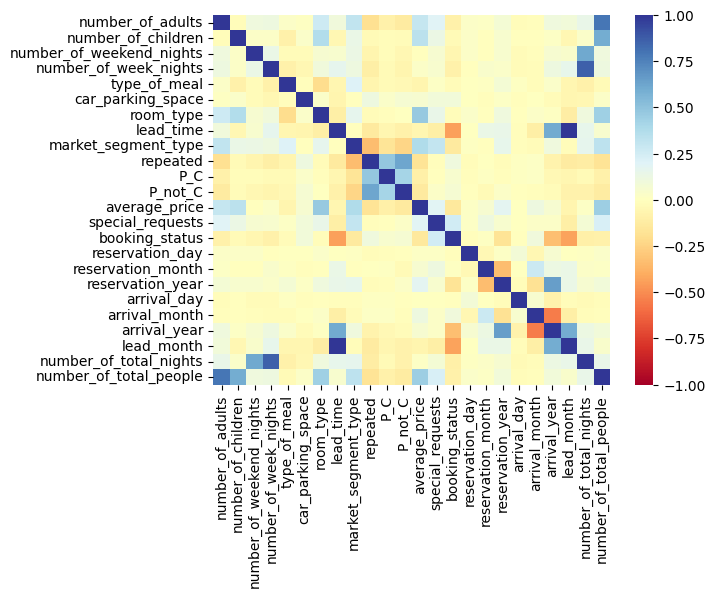

In [7]:
# lead time , market segment type, average price, special request,reservation year, arrival year and lead month has a correlation with booking status
from module import corr_heatmap
corr_heatmap(df,df.drop(['Booking_ID','date_of_reservation','date_of_arrival'], axis=1).columns)

### Univariate Feauture Selection (Select k best)


In [8]:
def feauture_selection_select_k_best(k, X, y):
    k_best = SelectKBest(k=k, score_func=f_classif)

    k_best.fit_transform(X, y)
    # Get the indices of the selected features
    selected_features_indices = k_best.get_support(indices=True)

    # Get the scores associated with each feature
    feature_scores_k_best = k_best.scores_

    # Create a list of tuples containing feature names and scores
    feature_info = list(zip(X.columns, feature_scores_k_best))

    # Sort the feature info in descending order based on scores
    sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
    
    feature_names, feature_scores = zip(*sorted_feature_info[:])
    df_feauture_k_best_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
    df_feautures_k_best =df_normalized.iloc[:, selected_features_indices]

    return df_feauture_k_best_score, df_feautures_k_best

In [9]:
df_feauture_k_best_score, df_feautures_k_best = feauture_selection_select_k_best(8,X,y)

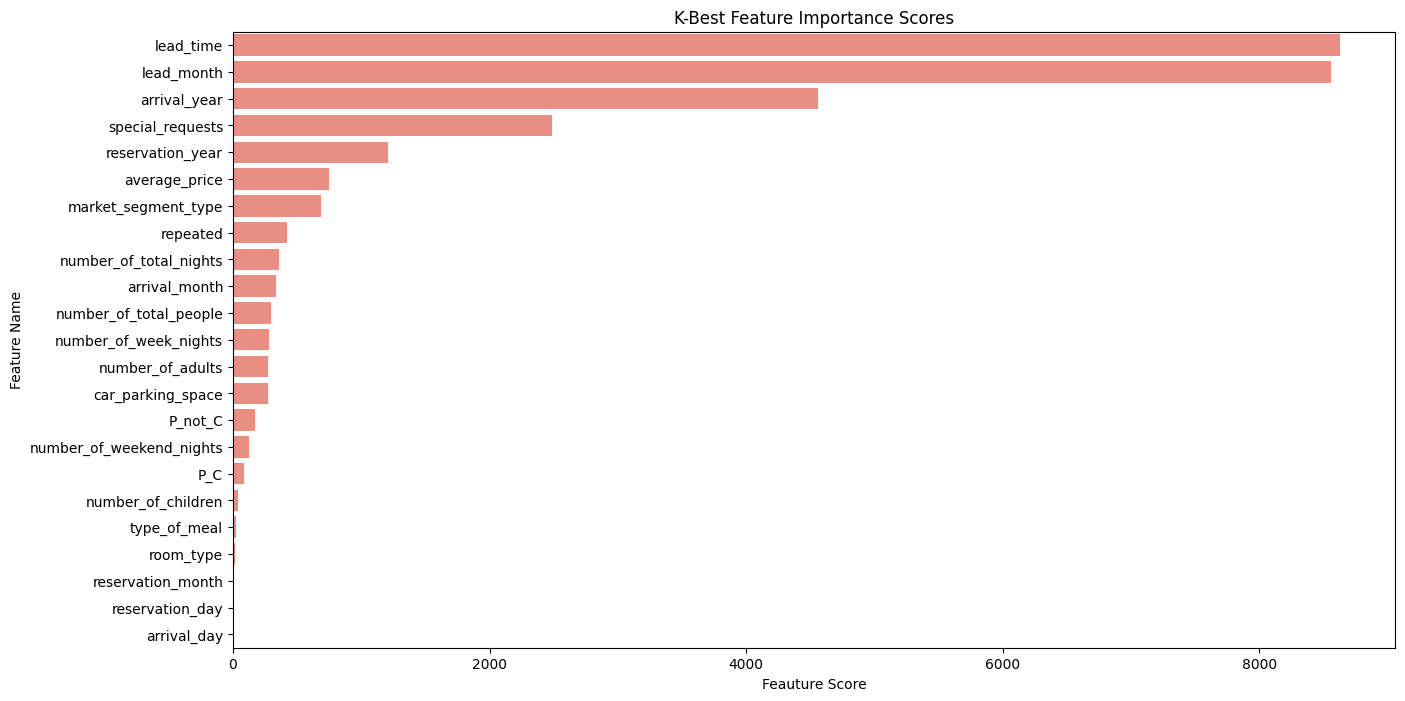

In [10]:
plot_bar(df_feauture_k_best_score,'feature_score', 'feature_name','K-Best Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')

In [11]:
df_feautures_k_best.columns

Index(['lead_time', 'market_segment_type', 'repeated', 'average_price',
       'special_requests', 'reservation_year', 'arrival_year', 'lead_month'],
      dtype='object')

In [12]:
def feature_selection_extra_trees_classifier(X,y):
    model = ExtraTreesClassifier()
    model.fit(X, y)
    feature_info = list(zip(X.columns, model.feature_importances_))

    # Sort the feature info in descending order based on scores
    sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
    feature_names, feature_scores = zip(*sorted_feature_info[:])
    df_extra_tree_class_feature_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
    extra_tree_class_selected_features = df_extra_tree_class_feature_score.query( 'feature_score > 0.05')['feature_name']
    df_feautures_extra_tree_class =df_normalized.loc[:, extra_tree_class_selected_features]
    return df_extra_tree_class_feature_score,df_feautures_extra_tree_class

 

In [13]:
df_extra_tree_class_feature_score,df_feautures_extra_tree_class = feature_selection_extra_trees_classifier(X,y)

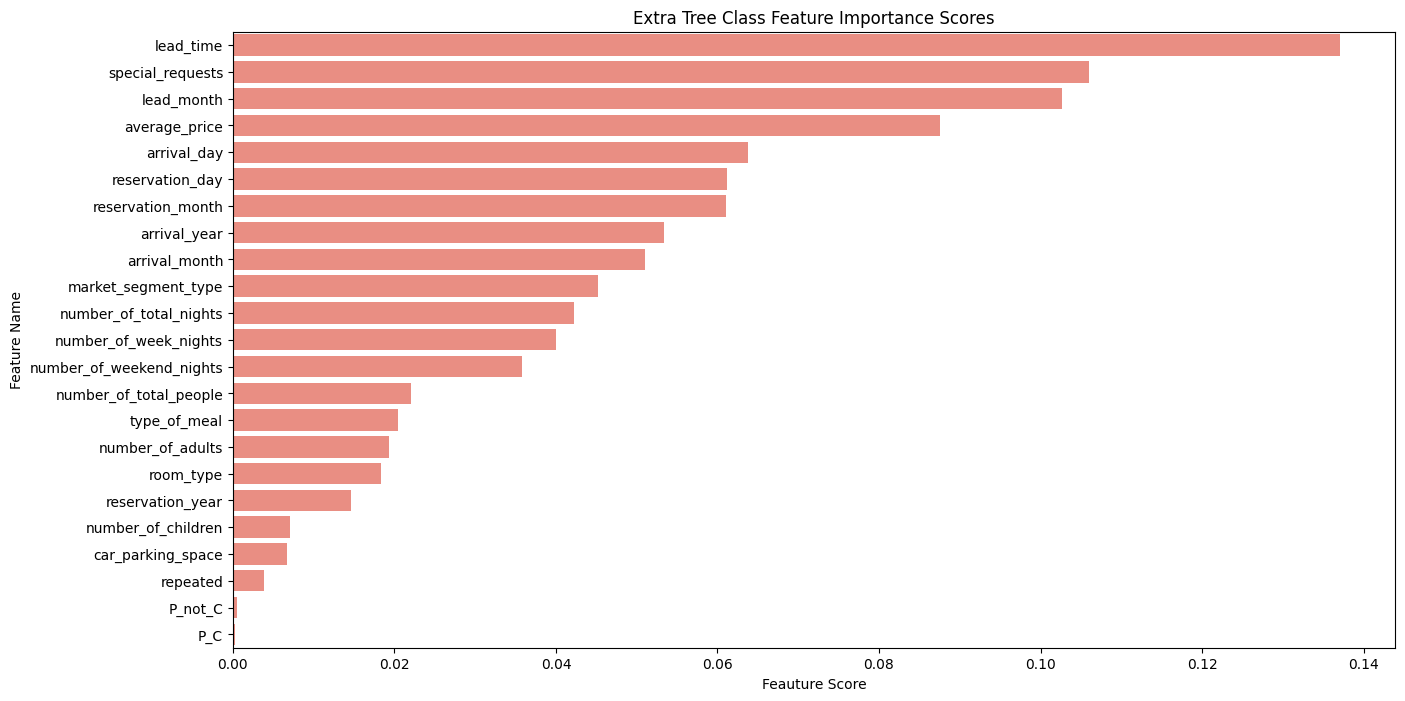

In [14]:
plot_bar(df_extra_tree_class_feature_score,'feature_score', 'feature_name','Extra Tree Class Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')

In [15]:
df_feautures_extra_tree_class.columns

Index(['lead_time', 'special_requests', 'lead_month', 'average_price',
       'arrival_day', 'reservation_day', 'reservation_month', 'arrival_year',
       'arrival_month'],
      dtype='object')

### Logistic Regression Feature Selection
We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a mode

In [16]:
def feauture_selection_logistic_regression(X,y):
  model = LogisticRegression()
  # fit the model
  model.fit(X, y)
  # get importance
  feature_scores_logistic = model.coef_[0]
  # summarize feature importance
  feature_info = list(zip(X.columns, feature_scores_logistic))
  # Sort the feature info in descending order based on scores
  sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
  feature_names, feature_scores = zip(*sorted_feature_info[:])
  df_logistic_feature_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
  logistic_regression_selected_features = df_logistic_feature_score.query( 'feature_score > 0.50 | feature_score < -0.50')['feature_name']
  df_feautures_logistic =df_normalized.loc[:, logistic_regression_selected_features]

  return df_logistic_feature_score,df_feautures_logistic

In [17]:
df_logistic_feature_score, df_feautures_logistic = feauture_selection_logistic_regression(X,y)

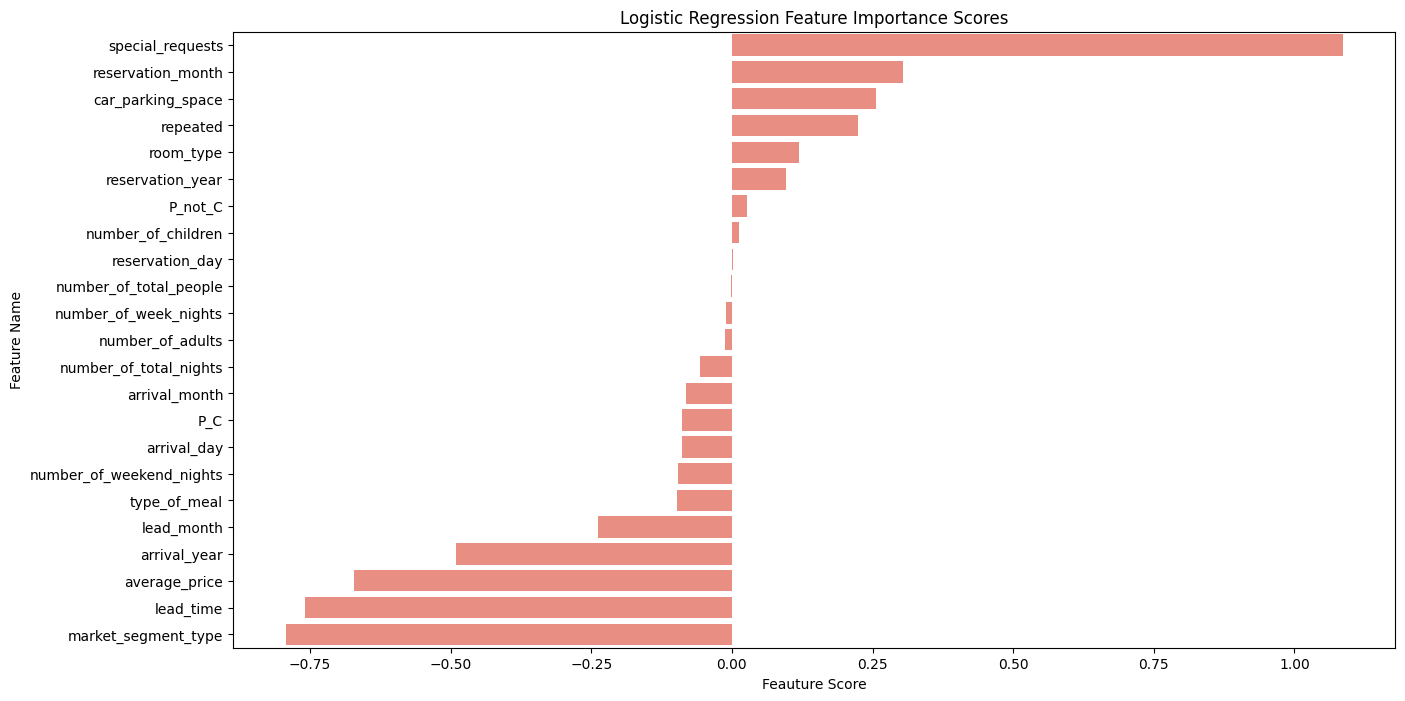

In [18]:
plot_bar(df_logistic_feature_score,'feature_score', 'feature_name','Logistic Regression Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')

In [19]:
df_feautures_logistic.head()

,special_requests,average_price,lead_time,market_segment_type
0,0.483622,0.097489,-0.933825,0.656666
1,-0.788182,-1.539407,-0.980397,0.656666
2,0.483622,-0.095427,1.464640,0.656666
3,-0.788182,-0.759657,-0.433175,0.656666
4,0.483622,0.122614,-0.596177,0.656666


### Decision Tree Feauture Selection

In [20]:
# decision tree for feature importance on a regression problem
def feature_selection_dt(X,y):
  model = DecisionTreeClassifier()
  # fit the model
  model.fit(X, y)
  # get importance
  feature_scores_dt = model.feature_importances_
  feature_info = list(zip(X.columns, feature_scores_dt))
  # Sort the feature info in descending order based on scores
  sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
  feature_names, feature_scores = zip(*sorted_feature_info[:])
  df_dt_feature_score = pd.DataFrame({'feature_name':feature_names,'feature_score':feature_scores})
  dt_selected_features = df_dt_feature_score.query( 'feature_score > 0.05 | feature_score < -0.05')['feature_name']
  df_feautures_dt =df_normalized.loc[:, dt_selected_features]

  return df_dt_feature_score,df_feautures_dt

In [21]:
df_dt_feature_score,df_feautures_dt = feature_selection_dt(X,y)

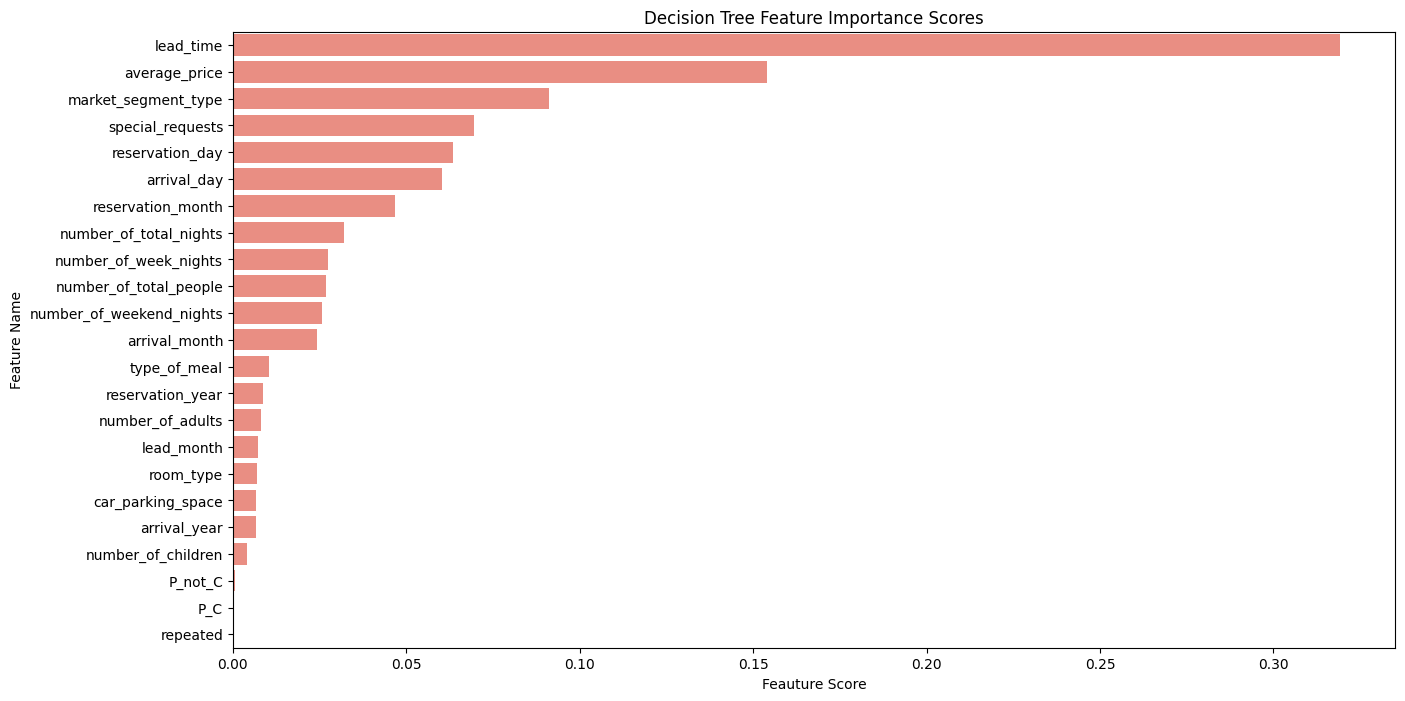

In [22]:
plot_bar(df_dt_feature_score,'feature_score', 'feature_name','Decision Tree Feature Importance Scores', 'Feauture Score', 'Feature Name',color='salmon',orient='h')

In [23]:
df_feautures_dt.head()

,lead_time,average_price,market_segment_type,special_requests,reservation_day,arrival_day
0,-0.933825,0.097489,0.656666,0.483622,-1.098253,-0.549184
1,-0.980397,-1.539407,0.656666,-0.788182,1.420551,-1.681093
2,1.464640,-0.095427,0.656666,0.483622,0.504622,0.129960
3,-0.433175,-0.759657,0.656666,-0.788182,-0.525797,1.488250
4,-0.596177,0.122614,0.656666,0.483622,-0.067833,0.243151


In [24]:
def train_model_and_predict(model,X_train,y_train,X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def evaluate_model(model,X_test,y_test, y_pred, display_labels=['Canceled','Not Canceled']):
    titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            X_test,
            y_test,
            display_labels=display_labels,
            cmap=plt.cm.Greens,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(y_test,y_pred,labels=[0,1]))

## Logistic Regression

### Training the Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split( df_feautures_logistic, df['booking_status'], test_size=0.2, random_state=10)
logreg = LogisticRegression()
y_pred = train_model_and_predict(logreg,X_train,y_train,X_test)

### Evaluate the Model

Confusion matrix, without normalization
[[1424 1010]
 [ 483 4339]]
Normalized confusion matrix
[[0.58504519 0.41495481]
 [0.10016591 0.89983409]]


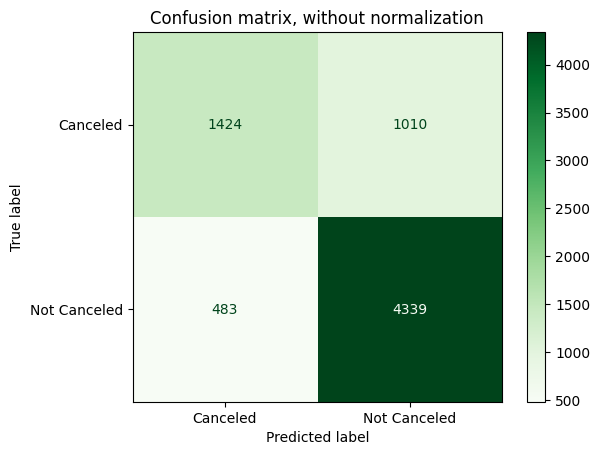

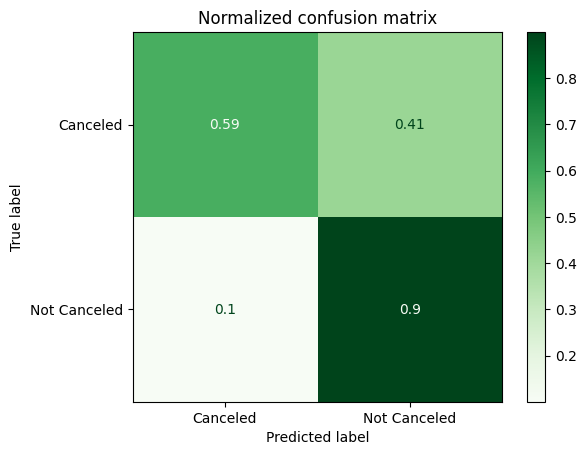

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2434
           1       0.81      0.90      0.85      4822

    accuracy                           0.79      7256
   macro avg       0.78      0.74      0.75      7256
weighted avg       0.79      0.79      0.79      7256



In [26]:
evaluate_model(logreg,X_test,y_test, y_pred)

## KNN

### Training the Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split( df_feautures_extra_tree_class, df['booking_status'], test_size=0.2, random_state=10)
knn = KNeighborsClassifier(n_neighbors=7)
y_pred = train_model_and_predict(knn,X_train,y_train,X_test)

### Evaluate the Model

Confusion matrix, without normalization
[[1725  709]
 [ 418 4404]]
Normalized confusion matrix
[[0.70870994 0.29129006]
 [0.08668602 0.91331398]]


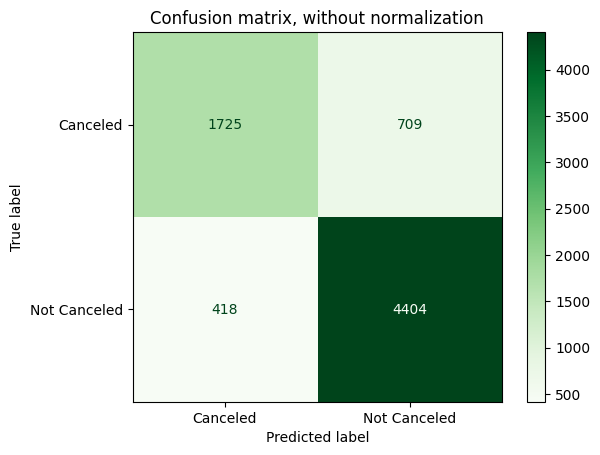

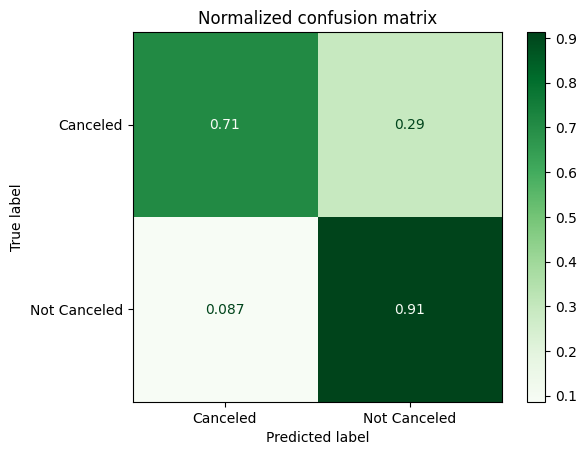

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2434
           1       0.86      0.91      0.89      4822

    accuracy                           0.84      7256
   macro avg       0.83      0.81      0.82      7256
weighted avg       0.84      0.84      0.84      7256



In [28]:
evaluate_model(knn,X_test,y_test, y_pred)

## Decision Tree

### Training the Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split( df_feautures_dt, df['booking_status'], test_size=0.2, random_state=10)
classifier = DecisionTreeClassifier()
y_pred = train_model_and_predict(classifier,X_train,y_train,X_test)

### Evaluate the Model

Confusion matrix, without normalization
[[1876  558]
 [ 585 4237]]
Normalized confusion matrix
[[0.77074774 0.22925226]
 [0.12131895 0.87868105]]


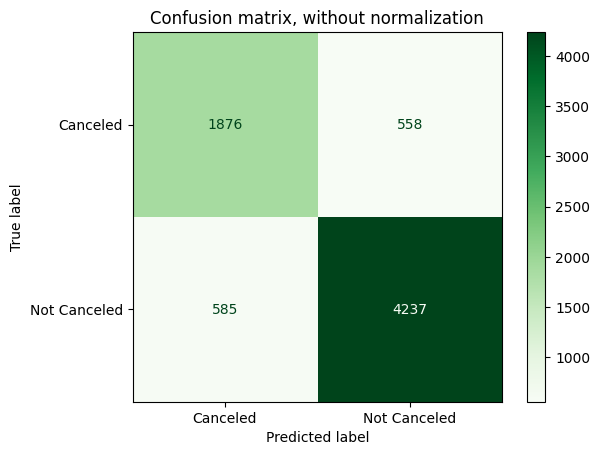

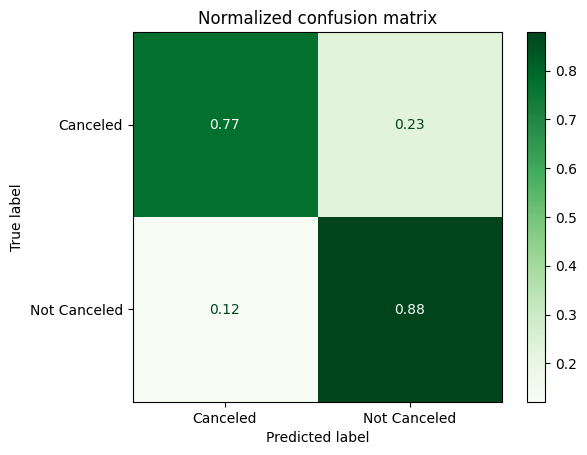

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2434
           1       0.88      0.88      0.88      4822

    accuracy                           0.84      7256
   macro avg       0.82      0.82      0.82      7256
weighted avg       0.84      0.84      0.84      7256



In [30]:
evaluate_model(classifier,X_test,y_test, y_pred)


## SVM

### Training the Model

In [31]:
X_train, X_test, y_train, y_test = train_test_split( df_feautures_extra_tree_class, df['booking_status'], test_size=0.2, random_state=10)

model = svm.SVC(kernel='rbf')
y_pred = train_model_and_predict(model,X_train,y_train,X_test)

model_2 =model = svm.SVC(kernel='linear')            
y_pred_2 = train_model_and_predict(model_2,X_train,y_train,X_test)


In [32]:

model_3 =model = svm.SVC(kernel='sigmoid')            
y_pred_3 = train_model_and_predict(model_3,X_train,y_train,X_test)

### Evaluate the Model

Confusion matrix, without normalization
[[1195 1239]
 [1130 3692]]
Normalized confusion matrix
[[0.49096138 0.50903862]
 [0.2343426  0.7656574 ]]


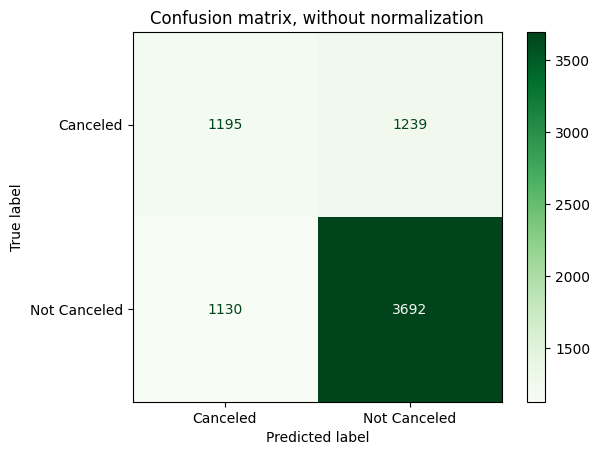

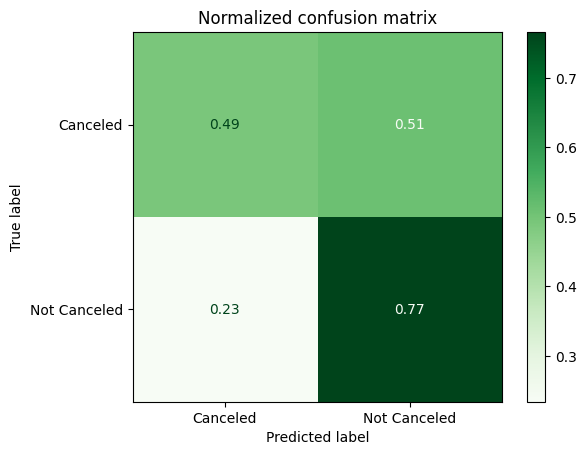

              precision    recall  f1-score   support

           0       0.79      0.59      0.68      2434
           1       0.82      0.92      0.87      4822

    accuracy                           0.81      7256
   macro avg       0.80      0.76      0.77      7256
weighted avg       0.81      0.81      0.80      7256



In [33]:
evaluate_model(model,X_test,y_test, y_pred)

Confusion matrix, without normalization
[[1198 1236]
 [ 411 4411]]
Normalized confusion matrix
[[0.49219392 0.50780608]
 [0.08523434 0.91476566]]


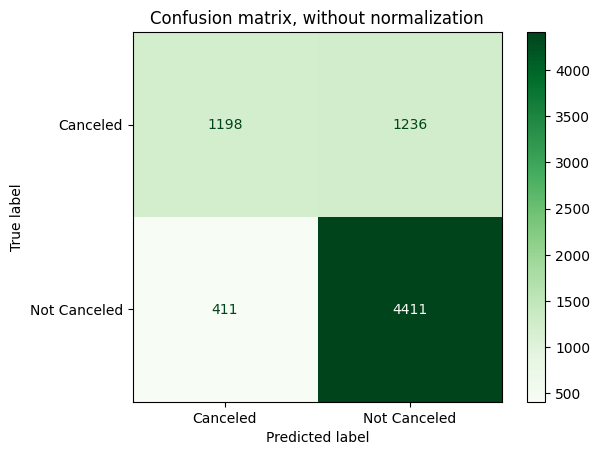

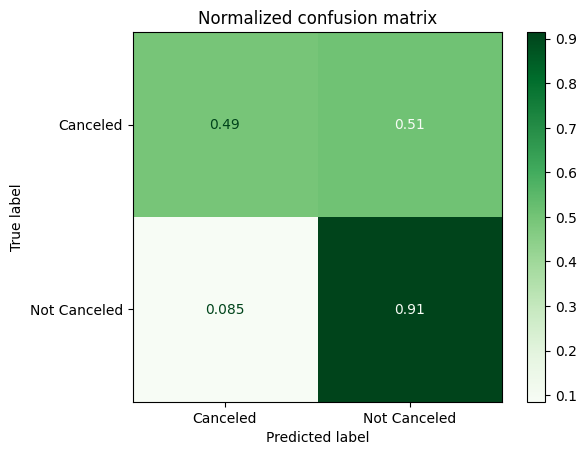

              precision    recall  f1-score   support

           0       0.74      0.49      0.59      2434
           1       0.78      0.91      0.84      4822

    accuracy                           0.77      7256
   macro avg       0.76      0.70      0.72      7256
weighted avg       0.77      0.77      0.76      7256



In [34]:
evaluate_model(model_2,X_test,y_test, y_pred_2)

Confusion matrix, without normalization
[[1195 1239]
 [1130 3692]]
Normalized confusion matrix
[[0.49096138 0.50903862]
 [0.2343426  0.7656574 ]]


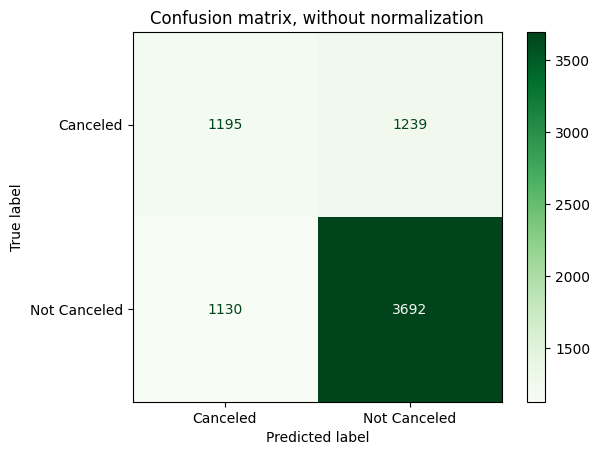

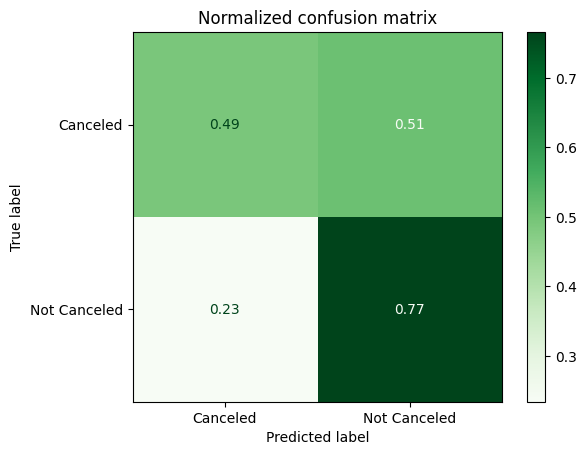

              precision    recall  f1-score   support

           0       0.51      0.49      0.50      2434
           1       0.75      0.77      0.76      4822

    accuracy                           0.67      7256
   macro avg       0.63      0.63      0.63      7256
weighted avg       0.67      0.67      0.67      7256



In [35]:
evaluate_model(model_3,X_test,y_test, y_pred_3)

# Compare Results